In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
!pip install xgboost

In [18]:
!pip install tensorflow

In [2]:
df = pd.read_csv("/Users/siddachalamalasetty/workspace/datascience-comps/ai-text-competition/training_set.csv")

In [3]:
print(df)

          ID  feature_0  feature_1  feature_2  feature_3  feature_4  \
0          1   0.231980  -0.190620  -0.985933  -0.233773  -0.355879   
1          2   0.168223  -1.204551  -0.596952  -0.722583   0.284799   
2          3   0.522005  -0.759933  -1.209413   0.301834   0.361126   
3          4   0.038746  -1.408335  -0.580810   0.353450   1.142353   
4          5  -0.307572   0.103575  -0.368605  -0.378654  -0.285990   
...      ...        ...        ...        ...        ...        ...   
11139  11140   0.388275  -0.776383  -1.236468  -0.090159   0.013522   
11140  11141   0.096468  -0.810038  -0.847827  -1.130093  -0.575835   
11141  11142  -0.277712  -0.822547  -0.788966  -0.783690   0.605847   
11142  11143   0.388307  -0.267300  -0.873434  -0.309149  -0.403474   
11143  11144  -0.126590  -0.904643  -0.559367  -1.498097   0.069002   

       feature_5  feature_6  feature_7  feature_8  ...  feature_761  \
0      -0.488884   0.254773  -0.121213  -0.820528  ...     0.101373   
1    

In [4]:
print(df.head())

   ID  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1   0.231980  -0.190620  -0.985933  -0.233773  -0.355879  -0.488884   
1   2   0.168223  -1.204551  -0.596952  -0.722583   0.284799  -0.238639   
2   3   0.522005  -0.759933  -1.209413   0.301834   0.361126   0.158161   
3   4   0.038746  -1.408335  -0.580810   0.353450   1.142353  -0.418879   
4   5  -0.307572   0.103575  -0.368605  -0.378654  -0.285990  -0.508058   

   feature_6  feature_7  feature_8  ...  feature_761  feature_762  \
0   0.254773  -0.121213  -0.820528  ...     0.101373     0.575414   
1  -0.410948  -0.090654   1.220703  ...     0.407270     0.769329   
2  -0.117013   0.313158   1.102455  ...     0.143658     0.874958   
3  -0.134133  -0.199796   1.071100  ...     0.728436     0.540930   
4  -0.254869  -0.108291  -0.095139  ...    -0.146845     0.497731   

   feature_763  feature_764  feature_765  feature_766  feature_767  \
0    -0.567646    -0.051293     0.455840     0.065538     0.0206

In [5]:
df.shape

(11144, 772)

In [6]:
# check distribution of values (1 = AI, 0 = Humans)
df['ind'].value_counts(normalize=True)

0    0.901292
1    0.098708
Name: ind, dtype: float64

In [7]:
df.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


In [8]:
# Remove word embeddings columns and see the statistics
df_no_text = df[["ID", "word_count", "punc_num", "ind"]]

# Check if there is any difference between AI Generated tweets and human generated

# word count

ai_text_word_count = df_no_text.loc[df["ind"] == 1, ['word_count']].describe()
human_text_word_count = df_no_text.loc[df["ind"] == 0, ['word_count']].describe()

stats_word_count = pd.concat([ai_text_word_count, human_text_word_count], axis=1)
stats_word_count.columns = ['AI', 'Human']
stats_word_count

# punc count

ai_text_punc_count = df_no_text.loc[df["ind"] == 1, ['punc_num']].describe()
human_text_punc_count = df_no_text.loc[df["ind"] == 0, ['punc_num']].describe()

stats_punc_count = pd.concat([ai_text_punc_count, human_text_punc_count], axis=1)
stats_punc_count.columns = ['AI', 'Human'] 
stats_punc_count



,AI,Human
count,1100.000000,10044.000000
mean,4.780000,7.628136
std,2.890598,4.050464
min,0.000000,0.000000
25%,3.000000,4.000000
50%,4.000000,7.000000
75%,7.000000,10.000000
max,20.000000,27.000000


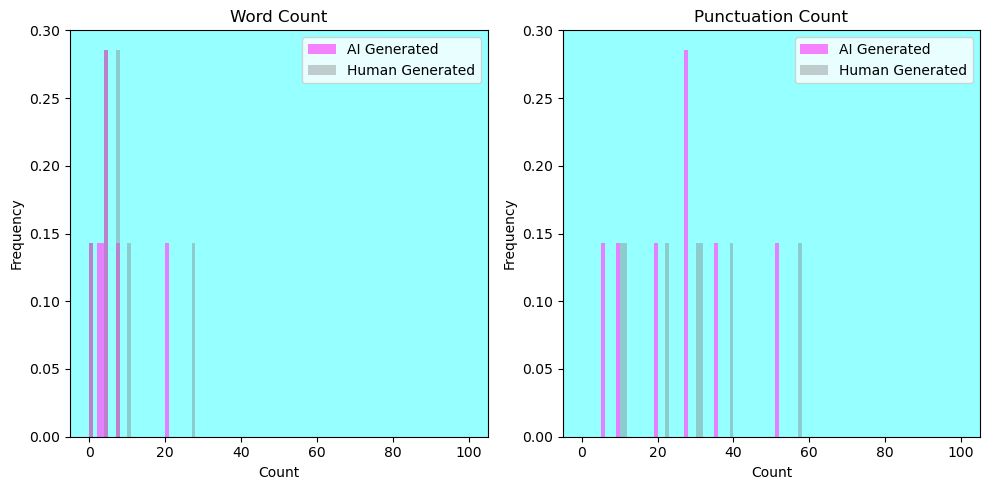

In [9]:
# Percentage plot side by side
num_bins = 100
range_val= (0, 100)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].hist(ai_text_punc_count, bins=num_bins, range=range_val, alpha=0.8,  color='#FA62FF', edgecolor='None', density=True, label='AI Generated')
axs[0].hist(human_text_punc_count, bins=num_bins, range=range_val, alpha=0.4,  color='grey', edgecolor='None', density=True, label='Human Generated')
axs[1].hist(ai_text_word_count, bins=num_bins, range=range_val, alpha=0.8, color='#FA62FF', edgecolor='None', density=True, label='AI Generated')
axs[1].hist(human_text_word_count, bins=num_bins, range=range_val, alpha=0.4, color='grey', edgecolor='None', density=True, label='Human Generated')
axs[0].set_facecolor('#96FFFF')
axs[1].set_facecolor('#96FFFF')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Word Count')
axs[0].legend(loc='upper right')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Punctuation Count')
axs[1].legend(loc='upper right')
axs[0].grid(False)
axs[1].grid(False)
plt.tight_layout()

In [10]:
# Get the column names starting with 'feature_'
feature_columns = [col for col in df.columns if col.startswith("feature_")]

# get the feature columns by itself
df_subtracted = df[feature_columns]

# PCA on features
from sklearn.decomposition import PCA
# Create an instance of the PCA class
pca = PCA(n_components=200)
# perform PCA on the selected variables
pca_features = pca.fit_transform(df_subtracted)

pca_features_df = pd.DataFrame(pca_features)
pca_features_df.columns = pca_feature_list = ['feature_pca_' + str(i) for i in range(200)]

pca_features_df.head()

# Add PCAs back to the dataframe
df_pca_joined = pd.concat([df.drop(columns = feature_columns), pca_features_df], axis=1)

df_pca_joined.head()

,ID,word_count,punc_num,ind,feature_pca_0,feature_pca_1,feature_pca_2,feature_pca_3,feature_pca_4,feature_pca_5,...,feature_pca_190,feature_pca_191,feature_pca_192,feature_pca_193,feature_pca_194,feature_pca_195,feature_pca_196,feature_pca_197,feature_pca_198,feature_pca_199
0,1,25,14,0,-4.325339,-6.027924,-0.353441,0.646321,3.176395,0.056122,...,0.217627,0.134405,0.374923,0.011387,-0.138936,-0.848670,-0.016438,0.071511,-0.305892,0.511024
1,2,23,4,0,9.537069,2.460621,1.681083,1.184408,-0.347033,1.034544,...,-0.139634,-0.037773,-0.010725,0.082122,0.231439,0.043763,0.122455,0.086310,-0.172401,0.489608
2,3,29,8,0,7.884325,-0.447550,-1.036353,3.073986,-0.969598,1.029391,...,0.006384,0.388507,-0.306128,-0.039387,-0.057278,0.226506,0.430160,0.259227,0.033843,0.014857
3,4,14,3,0,14.106463,-0.740270,0.088899,-1.275454,-2.169012,-0.618171,...,-0.022812,-0.152968,0.171839,0.192333,-0.069872,-0.139405,-0.095739,0.118985,-0.065818,0.065781
4,5,35,9,0,-6.444397,0.027403,6.044623,1.516972,1.096130,1.462042,...,0.124165,0.044252,-0.142338,-0.017548,-0.237372,-0.087337,0.042382,-0.092750,-0.162898,-0.429958


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import random
random.seed(1101)

# Split the data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca_joined.drop('ind', axis=1), df['ind'], test_size=0.2, random_state=42)
# Create an instance of the Linear Regression model
logistic_regression = LogisticRegression(max_iter=1500)
# fit the data into the modekl
logistic_regression.fit(X_train, y_train)
# make a prediction
y_pred = logistic_regression.predict(X_test)
# get f1 score
f1score = f1_score(y_test, y_pred)

print("F1 Score:", f1score)

F1 Score: 0.6140350877192982


In [12]:
# Load the test data
test = pd.read_csv('/Users/siddachalamalasetty/workspace/datascience-comps/ai-text-competition/test_set.csv')
test.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,1,0.233878,-0.575866,-0.817383,-1.308944,0.203170,-0.151178,-0.377259,-0.167252,0.260954,...,-1.252782,-0.030583,0.779688,0.680167,-0.147269,-0.162226,0.387746,-0.365837,24,7
1,2,-0.378112,0.019394,-0.261695,-0.213910,-0.339688,-0.440592,-0.247194,-0.134335,-0.160141,...,-0.287018,-0.208572,0.597342,-0.051946,0.072536,0.934986,-0.408139,-0.410480,36,9
2,3,-0.971502,-0.624442,-0.244309,-0.227205,-0.290587,0.235740,0.334917,-0.306881,0.188613,...,-0.198927,-0.063470,0.382500,0.318730,0.241873,1.182121,-0.157274,0.184486,22,2
3,4,0.206271,-0.234456,-0.275528,0.724101,-0.734225,-1.006453,-0.140558,-0.190625,-0.465205,...,-0.905444,0.213316,0.808676,0.220842,0.038097,0.151985,-0.024990,0.248526,38,5
4,5,-0.281816,-0.314982,-0.386653,-0.582492,-0.331799,-0.366927,-0.467231,-0.313802,0.383410,...,-0.037087,-0.238236,0.868876,-0.010560,-0.244176,0.980425,-0.363208,-0.568092,37,13


In [13]:
# now for test data

# Get the column names starting with 'feature_'
feature_columns = [col for col in test.columns if col.startswith("feature_")]

# get the feature columns by itself
test_subtracted = df[feature_columns]
pca_features_test = pca.fit_transform(test_subtracted)

pca_features_test_df = pd.DataFrame(pca_features_test)
pca_features_test_df.columns = pca_feature_list = ['feature_pca_' + str(i) for i in range(200)]

pca_features_test_df.head()

# Add PCAs back to the dataframe
test_pca_joined = pd.concat([test.drop(columns = feature_columns), pca_features_test_df], axis=1)
test_pca_joined.head()

,ID,word_count,punc_num,feature_pca_0,feature_pca_1,feature_pca_2,feature_pca_3,feature_pca_4,feature_pca_5,feature_pca_6,...,feature_pca_190,feature_pca_191,feature_pca_192,feature_pca_193,feature_pca_194,feature_pca_195,feature_pca_196,feature_pca_197,feature_pca_198,feature_pca_199
0,1.0,24.0,7.0,-4.325339,-6.027924,-0.353441,0.646321,3.176395,0.056122,-0.831616,...,-0.423734,0.207929,0.264235,0.031875,-0.220991,-0.020882,0.553851,-0.425679,0.774729,0.028680
1,2.0,36.0,9.0,9.537069,2.460621,1.681083,1.184408,-0.347033,1.034544,-1.711529,...,-0.140046,0.332475,-0.313887,0.252401,0.041544,-0.578866,0.285868,-0.759742,0.087808,0.182379
2,3.0,22.0,2.0,7.884325,-0.447550,-1.036353,3.073986,-0.969598,1.029391,-1.700350,...,0.041157,-0.343231,-0.097422,-0.565107,-0.257320,-0.369860,-0.024936,0.009214,-0.018487,-0.044668
3,4.0,38.0,5.0,14.106463,-0.740270,0.088899,-1.275454,-2.169012,-0.618170,-2.032464,...,-0.167298,0.054060,0.300583,0.125509,-0.149897,-0.029107,0.208170,0.318950,0.127867,0.026931
4,5.0,37.0,13.0,-6.444397,0.027403,6.044623,1.516972,1.096130,1.462042,0.619147,...,-0.010407,-0.303728,0.162818,-0.311643,0.281629,-0.173648,0.308758,-0.179341,0.184561,0.192115


In [14]:
# Scoring
#prediction = logistic_regression.predict(test_pca_joined)

# Check the predictions
#from collections import Counter
#Counter(prediction)

In [15]:
# same process but for naive bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [16]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred_nb = naive_bayes.predict(X_test)

In [49]:
f1score = f1_score(y_test, y_pred_nb)

print("F1 Score:", f1score)

F1 Score: 0.3707317073170731


In [19]:
# Same but for k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors=2933)
k_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2933)

In [46]:
y_pred_k = k_classifier.predict(X_test)

In [47]:
f1score = f1_score(y_test, y_pred_k)

print("F1 Score:", f1score)

F1 Score: 0.0


In [22]:
## implement SVM model

In [23]:
from sklearn import svm

In [24]:
svm_model = svm.SVC(kernel="linear")

In [56]:
# using Random Forest Classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [60]:
# just making a sequence of operations. first it will change the dataset in the right format and then apply the 
forest_model = make_pipeline(RandomForestClassifier(n_estimators=100, random_state=42))

In [61]:
forest_model.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [64]:
y_pred_r = forest_model.predict(X_test)

In [65]:
f1score = f1_score(y_test, y_pred_r)

print("F1 Score:", f1score)

F1 Score: 0.14035087719298245
